In [1]:
import pyscal.crystal_structures as pcs
import pyscal.csystem as pcm
import pyscal.core as pc
from ase import atoms
from ase.io import read, write
from ase.build import bulk
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from pychromatic import Multiplot
from pychromatic.colors import accent
import copy

In [18]:
nx = 20
print(nx**3*12)
atoms, box = pcs.make_crystal(structure="bcc", repetitions=(nx,nx,nx))
sys = pc.System()
sys.box = box
sys.atoms = atoms

96000


In [19]:
%%timeit
sys.find_neighbors(method='voronoi', cutoff=0.1)

1.47 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
len(sys.atom.voronoi.vertex.unique_positions)

96000

In [8]:
%%timeit
sys.find_neighbors(method='voronoi', cutoff=0.1, clean_vertices=False)

2.57 s ± 60.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
natoms = [(5**3)*2, (7**3)*2, (10**3)*2, (12**3)*2, (15**3)*2, (16**3)*2, (18**3)*2, (20**3)*2,]
t_voro_o1 = [21, 57, 168, 324, 609, 877, ]
t_voroc = [22, 60, 171, 359, 672, 857, 1200, 1600]
t_voro = [7, 21, 64, 130, 290, 351, 480, 637]
t_scipy = [7, 21, 78, 151, 377, 465, 671, 1000]

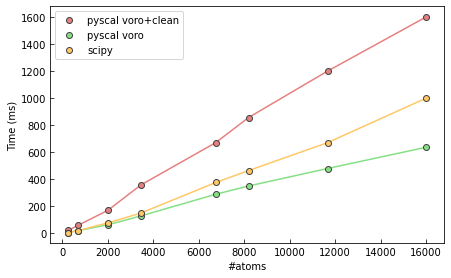

In [29]:
mlt = Multiplot()
mlt[0,0].plot(natoms, t_voroc, '-', color=accent['pred'])
mlt[0,0].plot(natoms, t_voro, '-', color=accent['pgreen'])
mlt[0,0].plot(natoms, t_scipy, '-', color=accent['pyellow'])
mlt[0,0].plot(natoms, t_voroc, 'o', label="pyscal voro+clean", color=accent['pred'], markeredgecolor=accent["dgrey"])
mlt[0,0].plot(natoms, t_voro, 'o', label="pyscal voro", color=accent['pgreen'], markeredgecolor=accent["dgrey"])
mlt[0,0].plot(natoms, t_scipy, 'o', label="scipy", color=accent['pyellow'], markeredgecolor=accent["dgrey"])
mlt[0,0].set_xlabel("#atoms")
mlt[0,0].set_ylabel("Time (ms)")
mlt[0,0].legend()
plt.savefig("voro_timing.png", dpi=300, bbox_inches="tight")

In [10]:
def get_distance(x, box, dim=3):
    box_2 = box/2
    xdum = []
    for i in range(dim):
        xd = np.meshgrid(x[i], x[i])[1] - np.meshgrid(x[i], x[i])[0]
        xdum.append(xd)
    xd = np.array(xdum)
    for i in range(dim):
        xd[i] = np.where(xd[i] > box_2[i], xd[i]-box[i], xd[i])
        xd[i] = np.where(xd[i] < -box_2[i], xd[i]+box[i], xd[i])
    return xd

In [12]:
x = sys.atoms['positions']
box = sys.boxdims

In [16]:
x = np.array(x)

In [20]:
y = x.T

In [28]:
%%timeit
xd = get_distance(y, np.array(box))

224 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
xd.shape

(3, 2000, 2000)

In [23]:
np.where(xd[]

array([[[ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        [ 1.5635,  0.    ,  1.5635, ...,  3.127 ,  4.6905,  3.127 ],
        [ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        ...,
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ],
        [-3.127 , -4.6905, -3.127 , ..., -1.5635,  0.    , -1.5635],
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ]],

       [[ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        [ 1.5635,  0.    ,  1.5635, ...,  3.127 ,  4.6905,  3.127 ],
        [ 0.    , -1.5635,  0.    , ...,  1.5635,  3.127 ,  1.5635],
        ...,
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ],
        [-3.127 , -4.6905, -3.127 , ..., -1.5635,  0.    , -1.5635],
        [-1.5635, -3.127 , -1.5635, ...,  0.    ,  1.5635,  0.    ]],

       [[ 0.    , -1.5635, -3.127 , ...,  4.6905,  3.127 ,  1.5635],
        [ 1.5635,  0.    , -1.5635, ...,  6.254 ,  4.6905,  3.127 ],
    